# 14a Neural Networks Tutorial
# Q2
The Neural Network implementation in `sklearn` provides the `alpha` parameter to control overfitting.  
Overfitting can also be managed by controlling the model complexity, by reducing the number of layers and by reducing the number of units in each layer.    
 - Use the Diabetes data for this analysis. 
 - Produce a graph of training and test set accuracy for different numbers of units in a neural network with a single hidden layer.    
 - Set `alpha` to 0.15.
 - The code provided runs the evaluation from 2 to 20 units in steps of 2.
 - Extend the evaluation up to 40 units.
 - Extend again to 80 units.


In [1]:
#!pip install tqdm

In [2]:
import pandas as pd
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,preg,plas,pres,skin,insu,mass,pedi,age,neg_pos
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [3]:
y = diabetesDF.pop('neg_pos').values
X = diabetesDF.values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3, random_state=1)

In [5]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(random_state=0,alpha = 0.15, max_iter=5000)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test))) 

Accuracy on training set: 0.932
Accuracy on test set: 0.781


In [12]:
max_units = 80
eval_range = range(2,max_units,2)
tr_scores = []
ts_scores = []

for h in tqdm(eval_range, desc="Training...", ncols = 100):
    
    mlp = MLPClassifier(random_state=2, alpha = 0.15, 
                        hidden_layer_sizes=[h], max_iter=5000)
    mlp.fit(X_train_scaled, y_train)
    tr_scores.append(mlp.score(X_train_scaled, y_train))
    ts_scores.append(mlp.score(X_test_scaled, y_test))

Training...: 100%|██████████████████████████████████████████████████| 39/39 [00:21<00:00,  1.81it/s]


Text(0, 0.5, 'Accuracy')

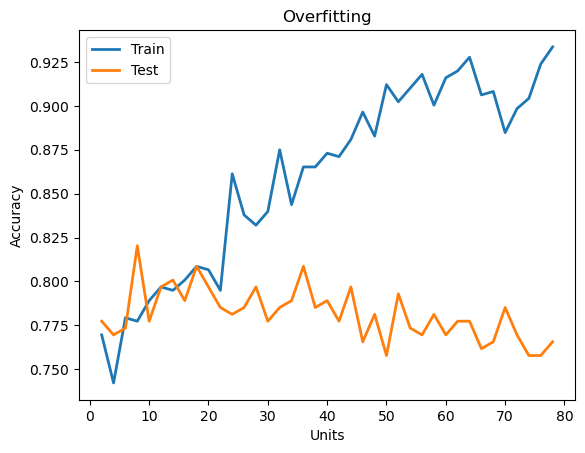

In [13]:
df = pd.DataFrame({'Train': tr_scores, 'Test': ts_scores}, index = eval_range) 
ax = df.plot(lw=2, title='Overfitting')
ax.set_xlabel("Units")
ax.set_ylabel("Accuracy")

# looking at the graph u can see a sweet spot around 20 so max units should be around 20

# Q3 Using Grid Search
Use the grid search facility in sklearn to find good values for alpha and the hidden layer size for the Neural Net. 
- A grid-search example is available in notebook 13 Grid Search. 
- You may need to run the grid-search a few times with different grids to home in on a good solution. 
- Use 8-fold cross validation and 'accuracy' as the metric. 

In [8]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(random_state=2, max_iter=10000)

grid = [{'alpha': [0.01, 0.1, 1, 10, 100],
         'hidden_layer_sizes': [[5], [10], [50]]}]
clf = GridSearchCV(mlp, grid, n_jobs = -1, cv=8, scoring = 'accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=MLPClassifier(max_iter=10000, random_state=2),
             n_jobs=-1,
             param_grid=[{'alpha': [0.01, 0.1, 1, 10, 100],
                          'hidden_layer_sizes': [[5], [10], [50]]}],
             scoring='accuracy')

In [9]:
clf.best_params_

{'alpha': 100, 'hidden_layer_sizes': [50]}